# Geologic information

**Description:** Download fault locations, geologic unit boundaries, and source information for Antarctic from the GeoMAP compilation. 

**Dataset:** 

Cox, Simon Christopher, Belinda Smith Lyttle, Samuel Elkind, Christine S. Smith Siddoway, Paul Morin, Giovanni Capponi, Tamer Abu-Alam, et al. “The GeoMAP (v.2022-08) Continent-Wide Detailed Geological Dataset of Antarctica.” PANGAEA, 2023. https://doi.org/10.1594/PANGAEA.951482.


**Associated paper:**

Cox, Simon C., Belinda Smith Lyttle, Samuel Elkind, Christine Smith Siddoway, Paul Morin, Giovanni Capponi, Tamer Abu-Alam, et al. “A Continent-Wide Detailed Geological Map Dataset of Antarctica.” Scientific Data 10, no. 1 (May 18, 2023): 250. https://doi.org/10.1038/s41597-023-02152-9.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, regions

In [2]:
version_names = [
    "faults",
    "units",
    # "sources", # not interesting to plot
    # "quality", # not interesting to plot
]


data = []
for name in version_names:
    d = fetch.geomap(
        version=name,
        # available options
        # region,
    )
    # only keep subset of largest units to speed up the plotting below
    if name == "units":
        d = d.sort_values(by="Shape_Area", ascending=False).copy()
        d = d.iloc[0 : int(len(d) / 4)]  # largest 1/4 of shapes
    data.append(d)

100%|████████████████████████████████████████| 196M/196M [00:00<00:00, 285GB/s]


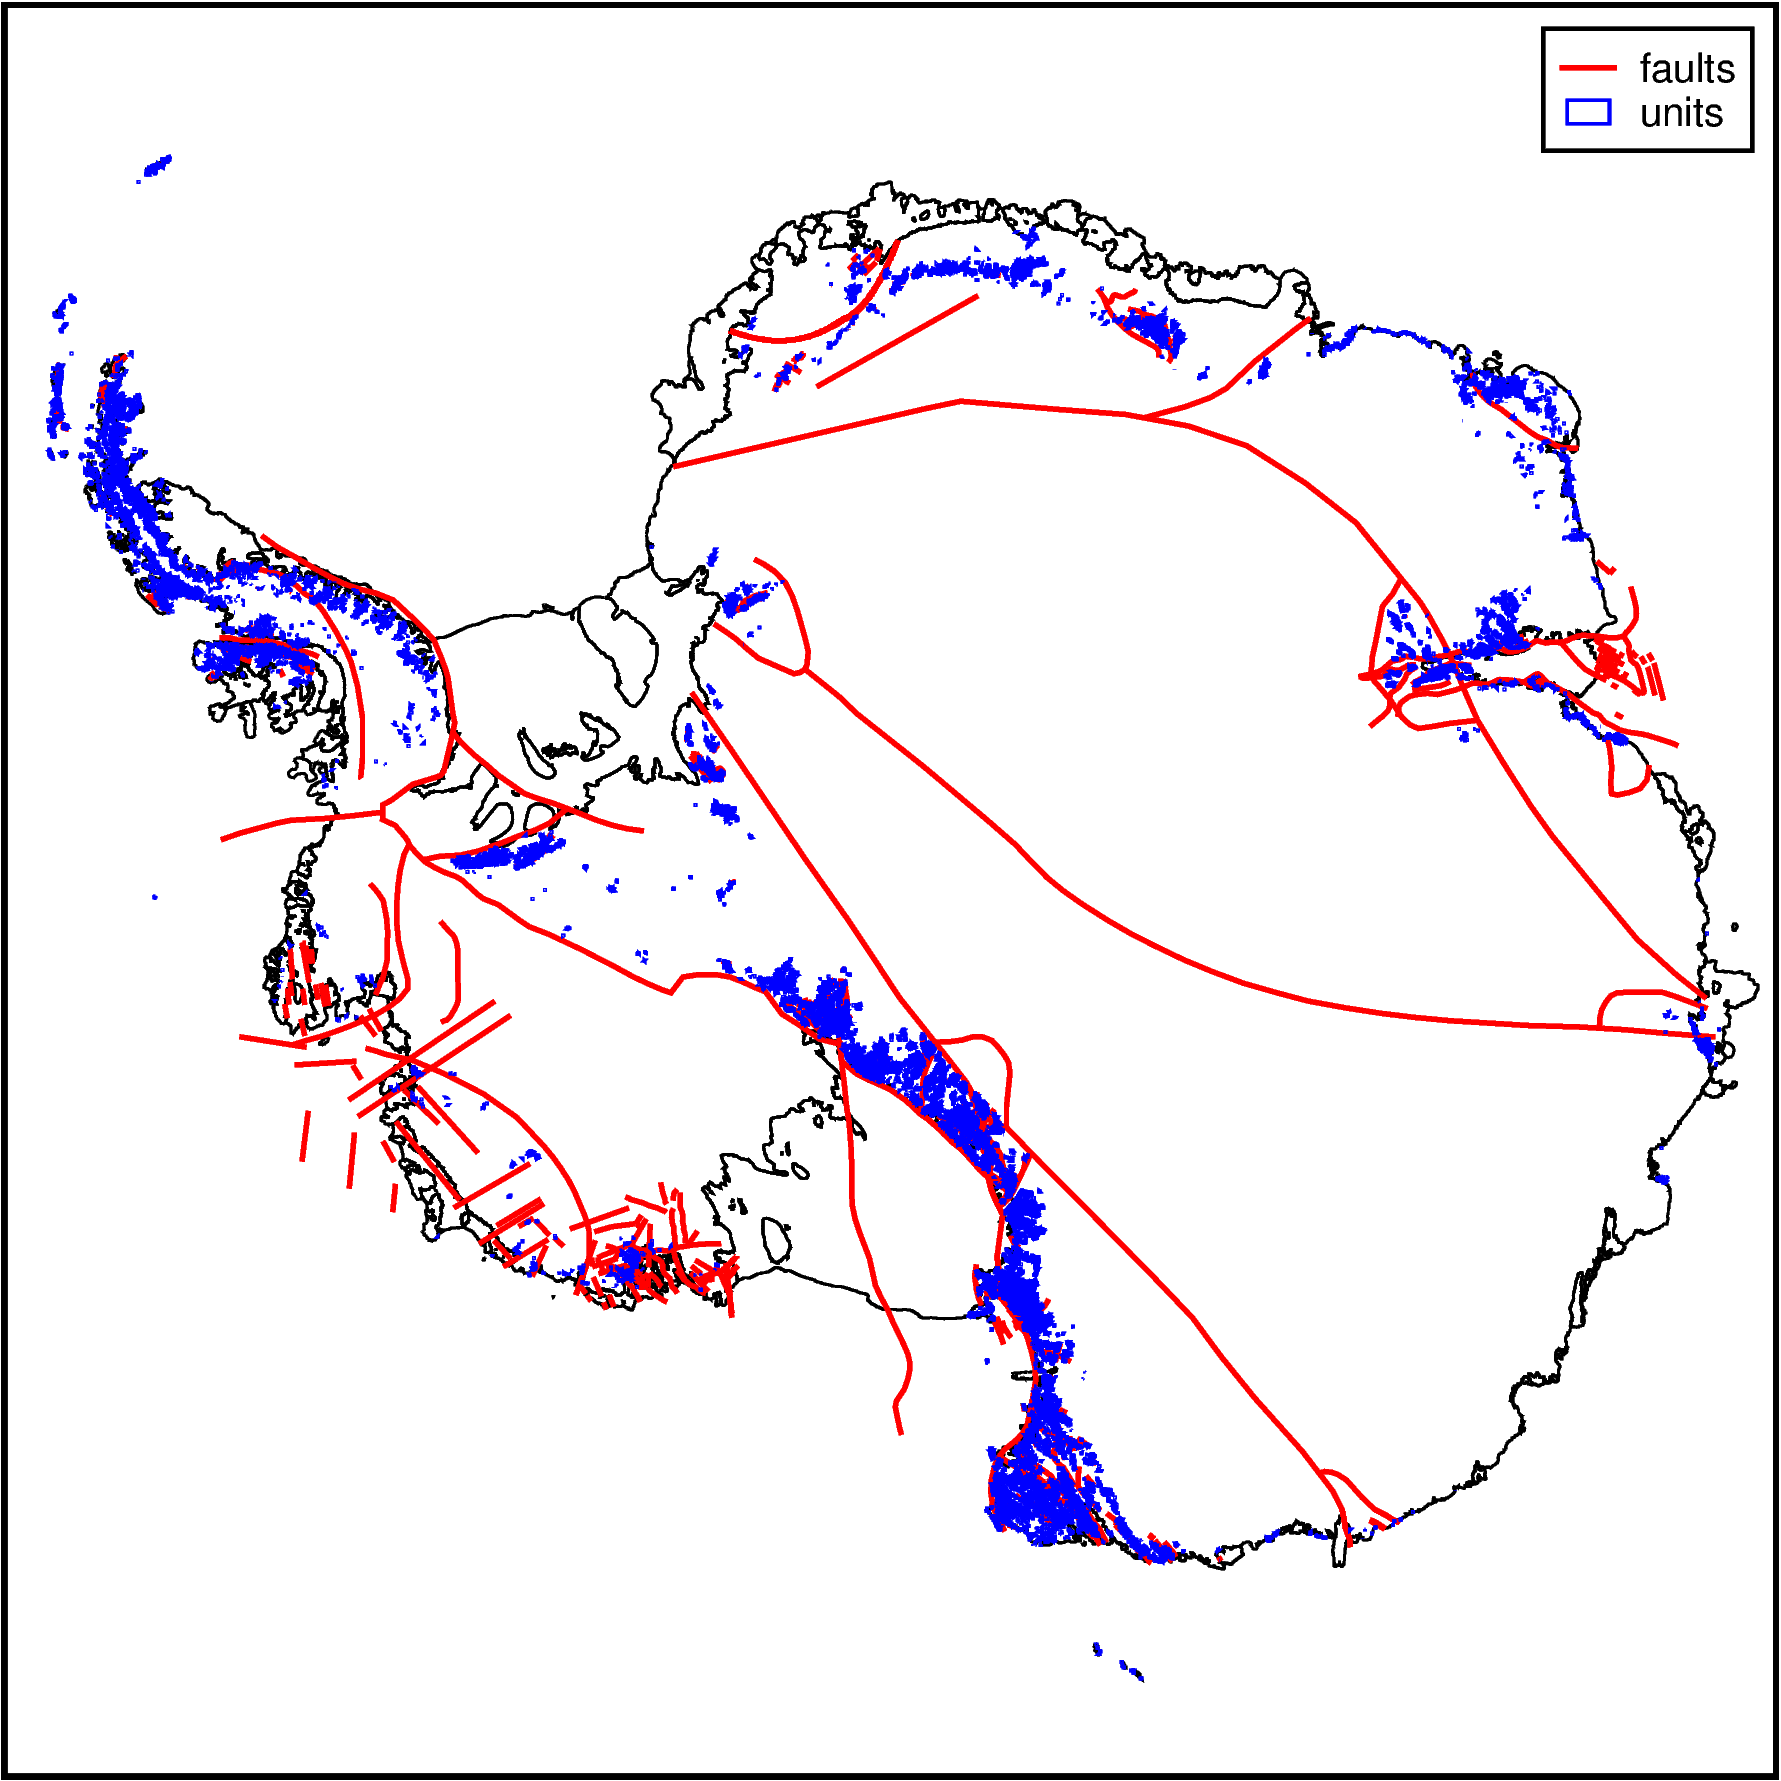

In [3]:
fig = maps.basemap(
    region=regions.antarctica,
    hemisphere="south",
    coast=True,
)


# plot the shapefiles
pens = ["1.2p,red", ".8p,blue"]
for i, v in enumerate(version_names):
    fig.plot(data[i], pen=pens[i], label=v)

# add a legend
fig.legend()

fig.show()

## Plotting faults

You can also use the function `maps.add_faults` for an easy way to specify and plot faults.

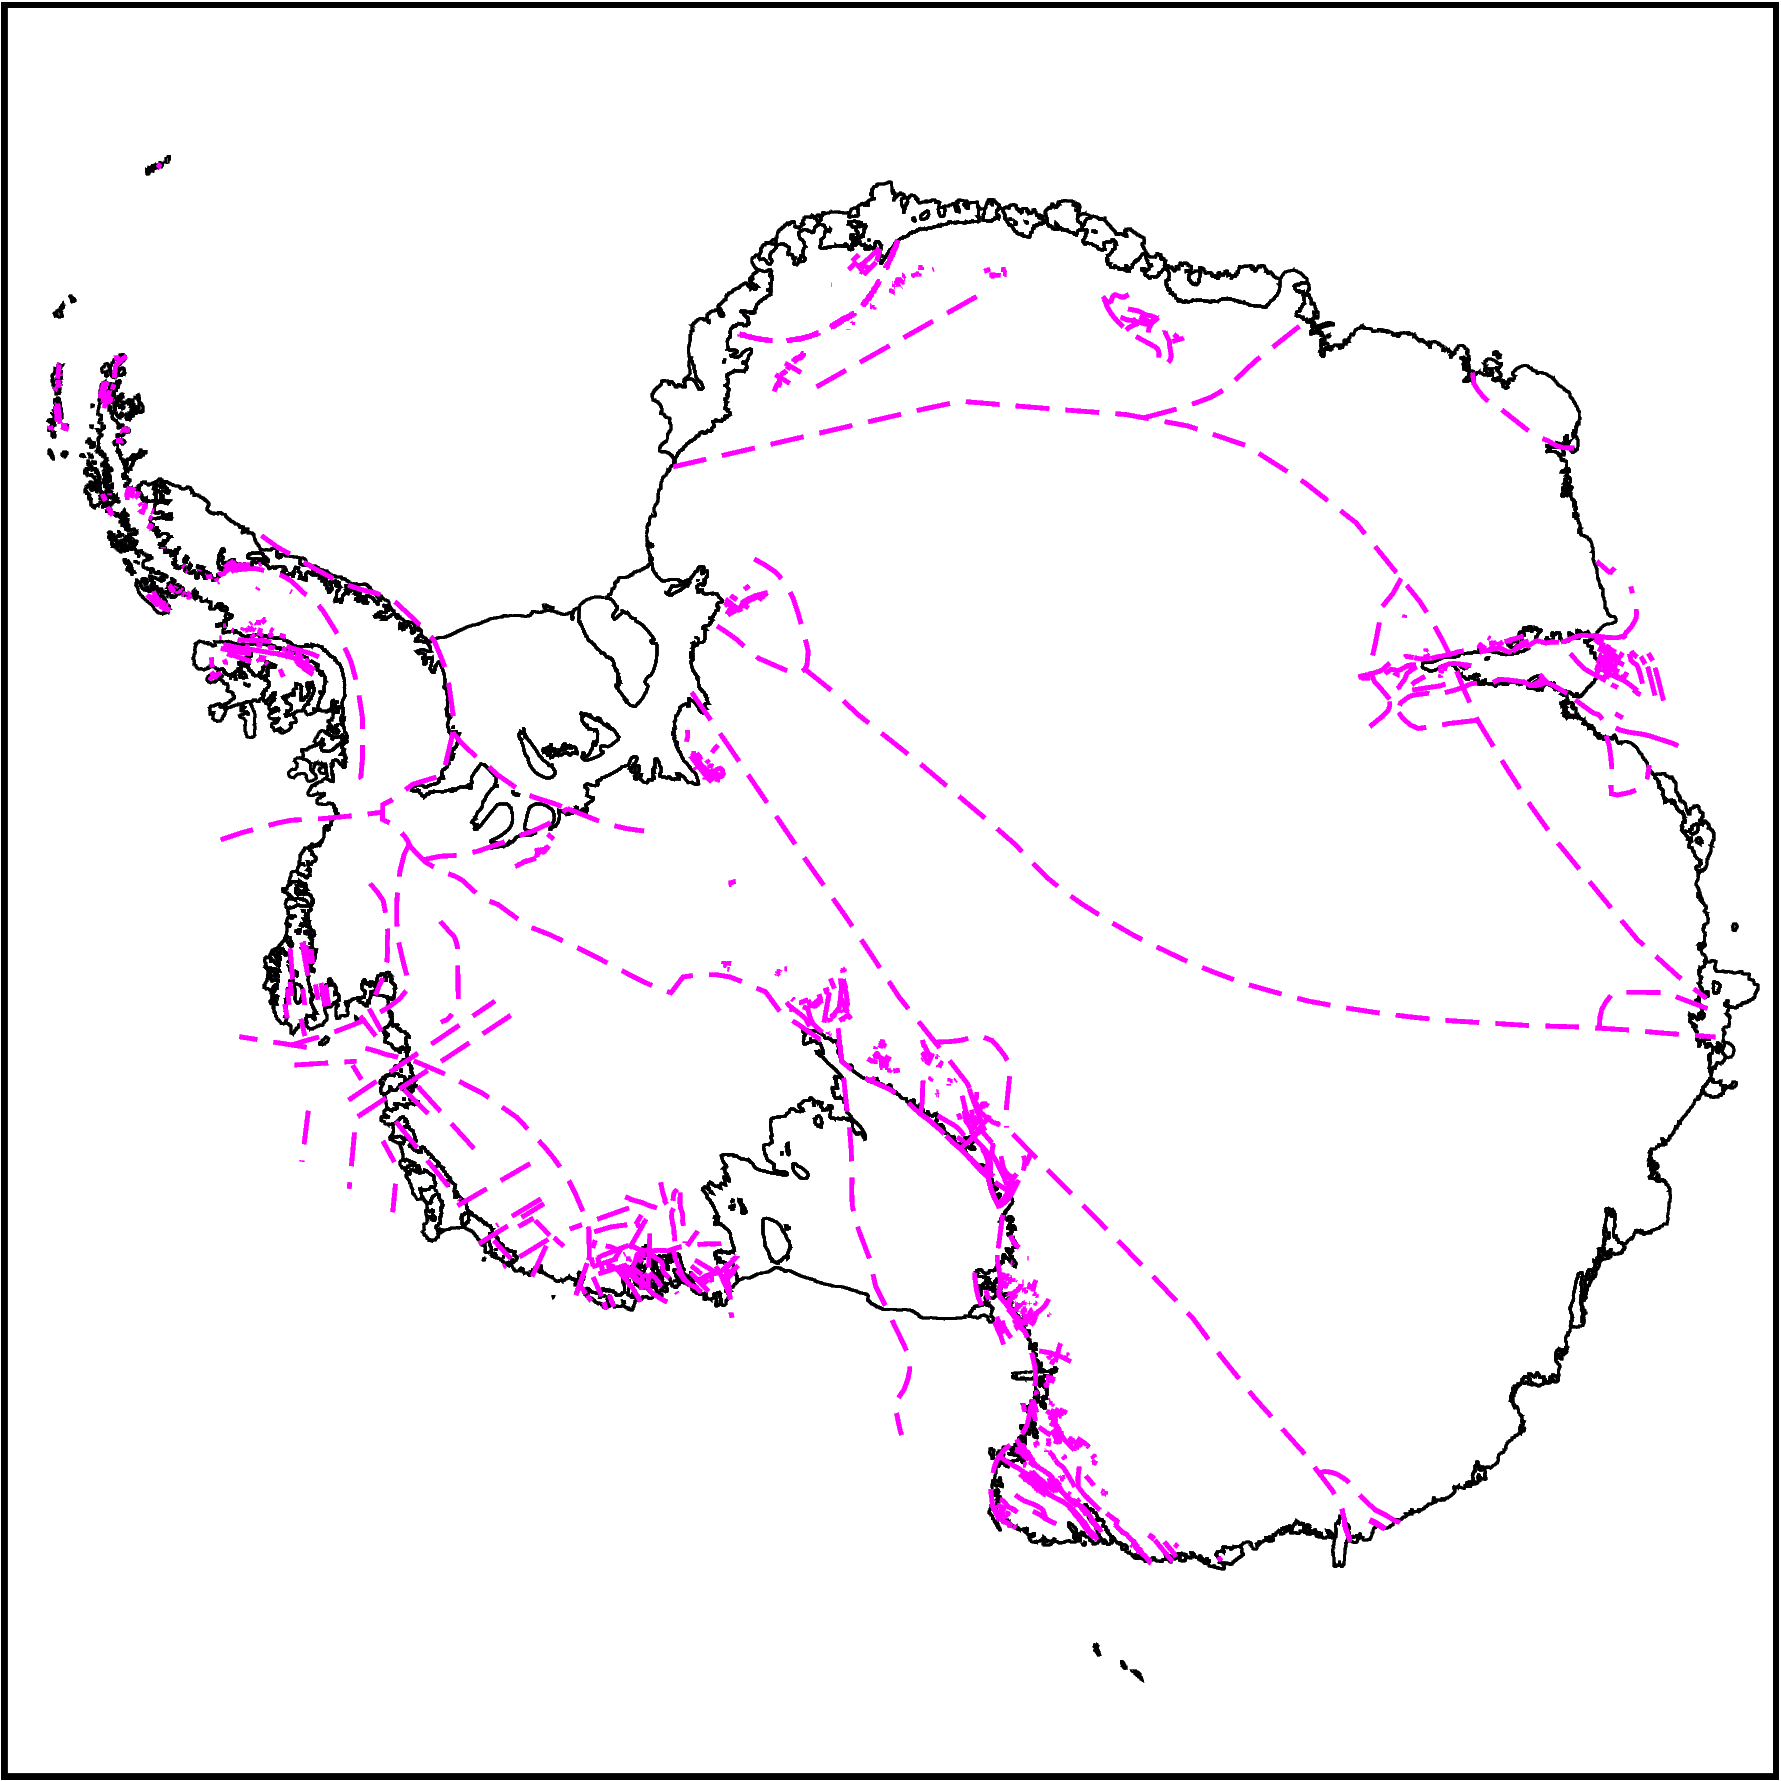

In [4]:
fig = maps.basemap(
    region=regions.antarctica,
    hemisphere="south",
    coast=True,
)

# with defaults
maps.add_faults(
    fig=fig,
)

fig.show()

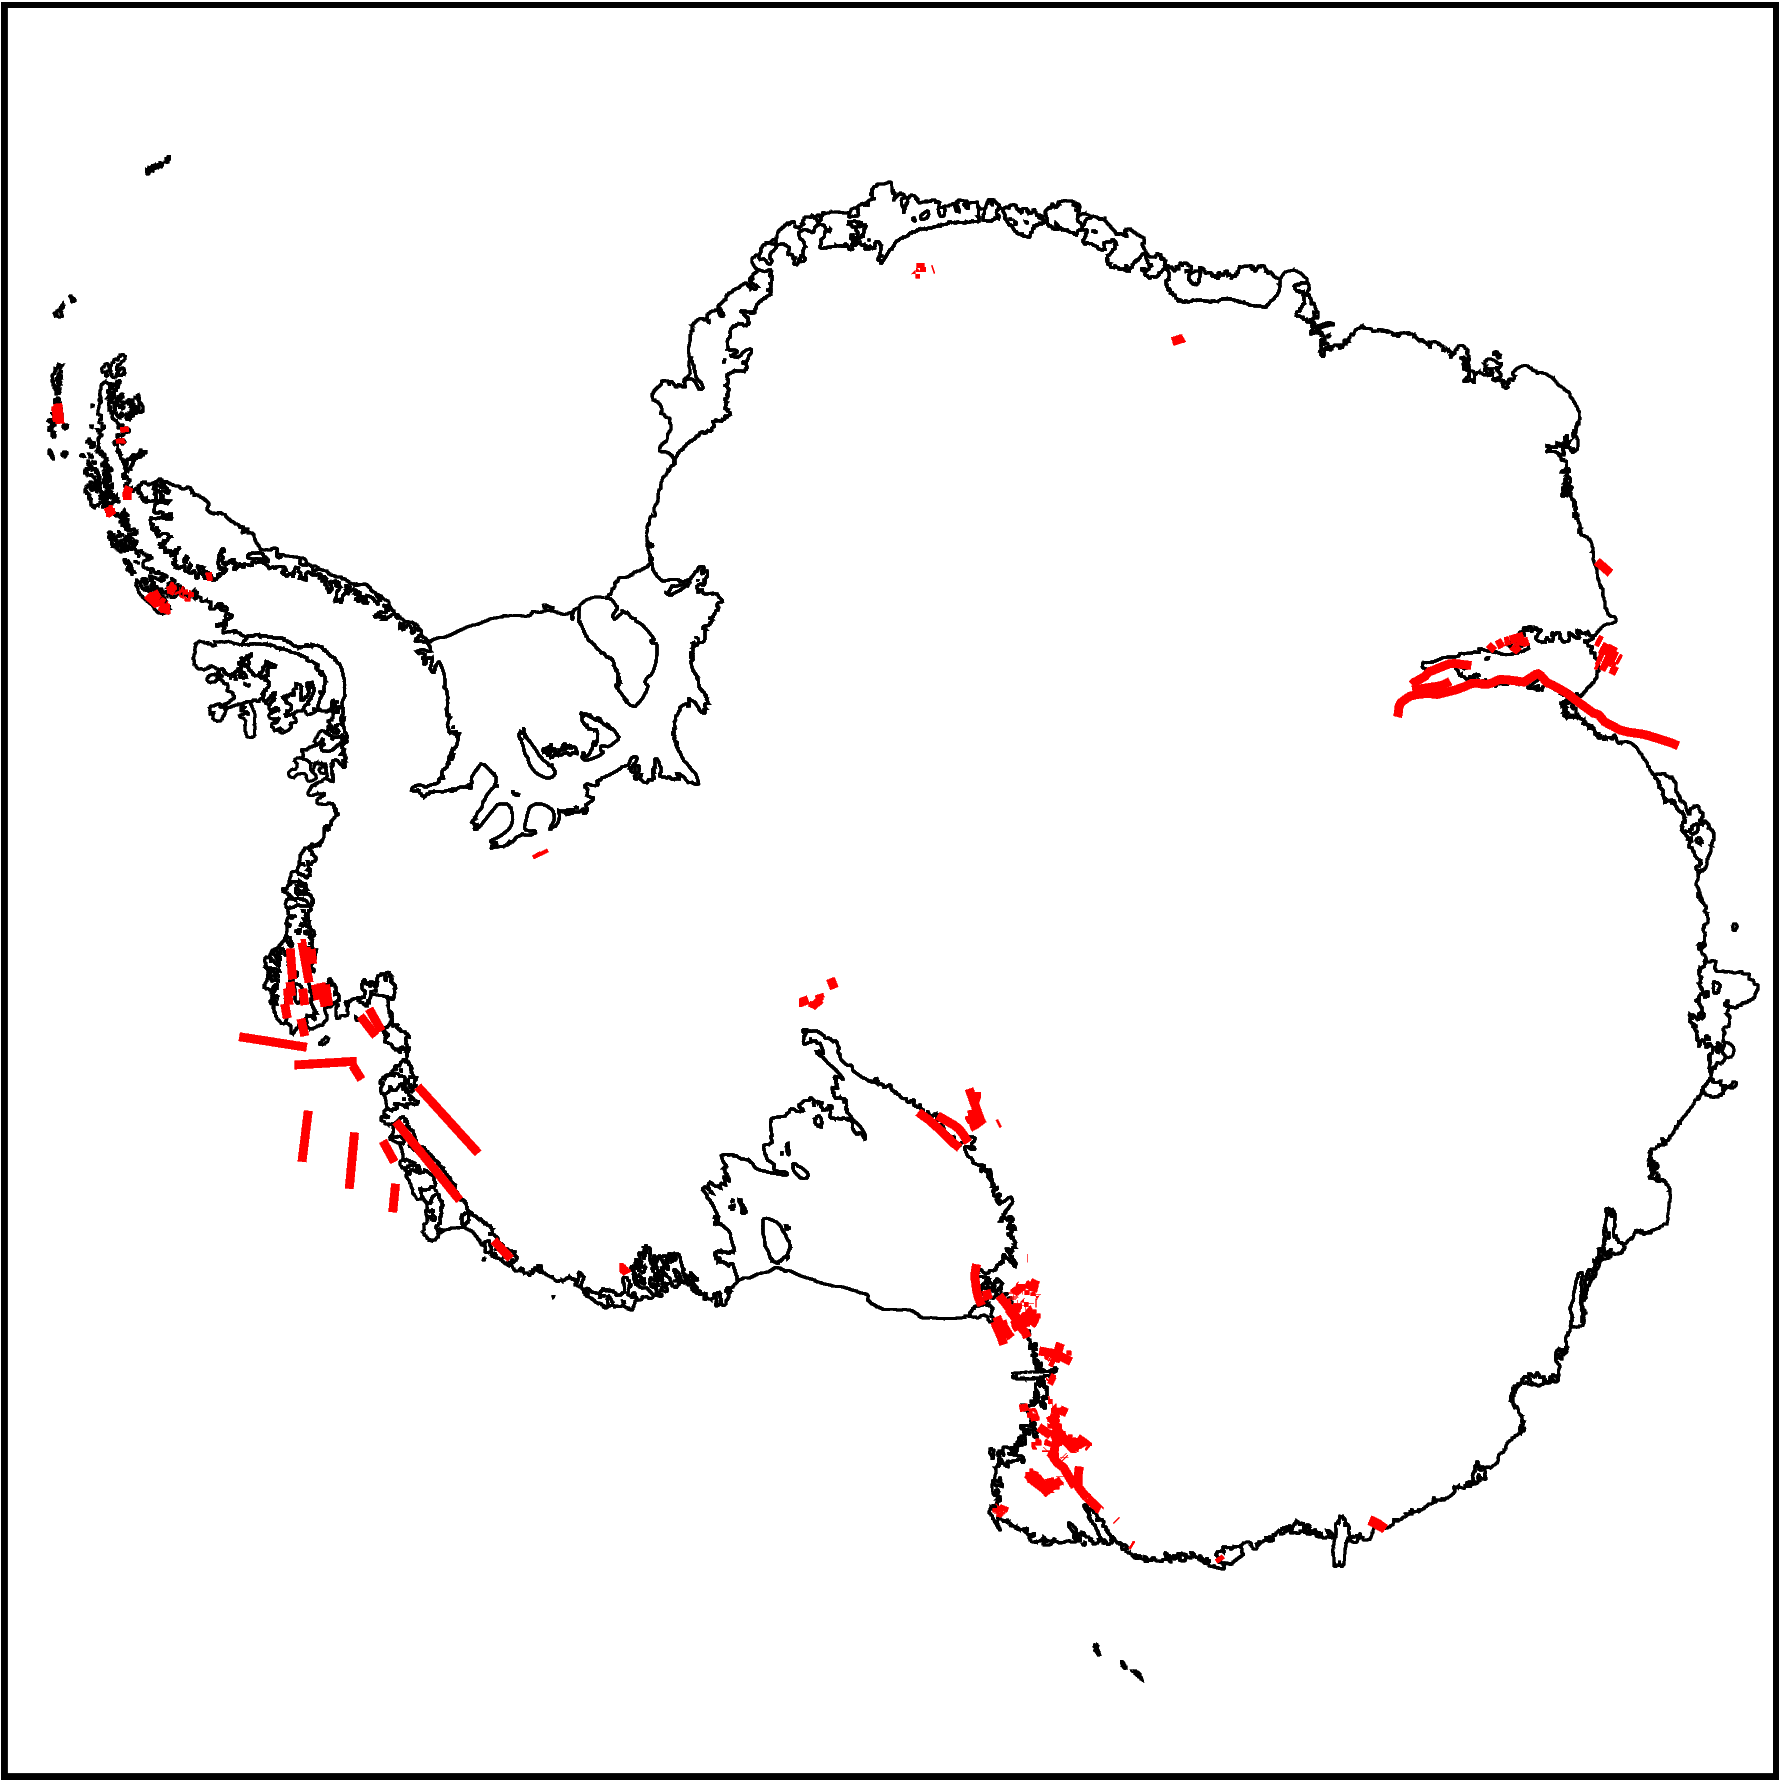

In [5]:
fig = maps.basemap(
    region=regions.antarctica,
    hemisphere="south",
    coast=True,
)

# specifying fault types
maps.add_faults(
    fig=fig,
    fault_activity="inactive",
    fault_motion="normal",
    fault_exposure="inferred",
    pen="2p,red",
)

fig.show()